# Data Analyst NanoDegree (DAND) Project #4: Data Wrangling

## Table of Contents
<ul>
<li><a href="#intro">Section 1: Introduction</a></li>
<li><a href="#gather_arch">Section 2: Gather Twitter Archive</a></li>
<li><a href="#gather_img">Section 3: Gather Tweet Image Predictions</a></li>
<li><a href="#assess_arch">Section 4: Assess Twitter Archive</a></li>
<li><a href="#assess_img">Section 5: Assess Tweet Image Predictions</a></li>
<li><a href="#clean_arch">Section 6: Clean Twitter Archive</a></li>
<li><a href="#gather_extra">Section 7: Gather Extra Per Tweet</a></li>
<li><a href="#assess_extra">Section 8: Assess Extra Per Tweet</a></li>
<li><a href="#clean_extra">Section 9: Clean Extra Per Tweet</a></li>
<li><a href="#clean_img">Section 10: Clean Tweet Image Predictions</a></li>
<li><a href="#analysis">Section 11: Analysis</a></li>
</ul>

<a id='intro'></a>
## Section 1: Introduction
> **Project Motivation**: "Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations."


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import sys
import json
import re
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather_arch'></a>
## Section 2: GATHER twitter-archive-enhanced

In [2]:
# Read twitter_archive_enhanced.csv
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_tweets.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


<a id='gather_img'></a>
## Section 3: GATHER image prediction data

In [4]:
# Get image_predictions.tsv from Udacity server
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [5]:
# Store image predictions data into dataframe
df_img_predict = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')

<a id='assess_arch'></a>
## Section 4: ASSESS twitter-archive-enhanced
> The following are some questions that need to be answered during the **assess** phase of the twitter archive data
>
> * Are retweets all removed? Retweets text fields start with "RT @" and/or have a non-empty retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp fields.
>
> * Are all of the tweet_ids unique?
>
> * Are the doggo, floofer, pupper & puppo fields consistent?
>
> * The doggo, floofer, pupper and puppo fields represent a tidiness issue. Each variable should form a column but all of these columns provide values for one variable - the descriptive term for the dog.
>
> * While the rating_numerator and rating_denominator fields are obviously not always intended to be accurate in any sense, in order to do analysis and visualization they most be converted into numbers that are well-behaved (**EDA**). 
>
> * Do the non-dog tweets bare-out the image prediction results?
>
> * After cleaning the df_tweets data investigate the difference in number of tweets in df_tweets and df_img_predict


In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# Based on df_tweets.info() results above, there are 181 non-null retweeted_status_id, retweeted_status_user_id 
# & retweeted_status_timestamp fields. These retweets need to be cleaned

In [8]:
# Are any of the tweet_ids duplicated?
df_tweets.tweet_id.nunique()

2356

In [9]:
# Since there are only 2349 unique values in the tweet_id field and there are 2356 rows, there must be 7 duplicated tweet_ids
dup_tweets = df_tweets.tweet_id.duplicated()
dup_tweets.value_counts()

False    2356
Name: tweet_id, dtype: int64

In [10]:
# The ratings numerator and denominator fields are non-standard but some values look like errors or, at least, outliers
df_tweets.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [11]:
# The ratings numerator and denominator fields are non-standard but some values look like errors or, at least, outliers
df_tweets.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

## ASSESS Documentation twitter-archive-enhanced

### Quality issues:
>
> * Data contains retweets
>
> * Data contains replies to WeRateDogs account tweets
> 
> * There are duplicate tweet IDs
> 
> * rating_numerator and rating_denominator fields contain errors in extracting values from the tweet text
>
> * name field contains errors in values extracted from the tweet text
> 
> * Column headings need to be capitalized and, in some cases, made more descriptive
>
> * expanded_urls appears to have been conceived to hold one URL for each of the photos that make up a submission commented on in the tweet. However, it appears that a composite of all of the submitted photos associated with the tweet appear in the photo at the URL provided in this field, then that same URL is repeated the number of times that there are shots that composite. While this is being noted, it is _not necessary_ to fix it.
>
### Tidiness issues:
>
> * doggo, floofer, pupper and puppo columns violate the "each variable forms a column" tidiness principle since these terms are just description extracted from the tweet text
> 
> * Since retweets and reply tweets are not from the WeRateDogs account and are being removed, the following columns are no longer needed (i.e., correspond to no variables): retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id 

<a id='assess_img'></a>
## Section 5: ASSESS image predictions data

In [12]:
df_img_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [13]:
df_img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Programmatic assessment of numeric fields
df_img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
# Check for duplicate images
df_img_predict.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [16]:
# Programmatic assessment using sample
df_img_predict.sample(n=50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1267,749403093750648834,https://pbs.twimg.com/media/CmZqIslWIAQFiqe.jpg,1,Chesapeake_Bay_retriever,0.694541,True,curly-coated_retriever,0.076335,True,Irish_water_spaniel,0.048550,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
1867,843856843873095681,https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg,1,Labrador_retriever,0.922540,True,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
873,697995514407682048,https://pbs.twimg.com/media/Ca_HN8UWEAEB-ga.jpg,1,Staffordshire_bullterrier,0.280222,True,Boston_bull,0.161478,True,American_Staffordshire_terrier,0.126884,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
1595,798925684722855936,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,1,West_Highland_white_terrier,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True


## ASSESS Documentation image prediction data

### Quality issues:
>
> * Column headings need to be capitalized and made more descriptive
>
> * Some of the tweet_ids don't appear in the twitter-archive-enhanced data. This will be a problem when we perform analysis.
>
> * Some of the images appear more than once in the dataset
>
### Tidiness issues:
>
> * The structure of this data violates the tidiness rule that each variable forms a column. The p1, p2, p3 fields each contain a dog breed prediction when p1_dog, p2_dog, p3_dog, respectively is true. However p1, p2, p3 contains a non-dog prediction in cases where p1_dog, p2_dog, p3_dog, respectively are false. While it may only be a semantic improvement it seems tidier if we had a set of columns for predicted object that included a value of "dog" and a dog_breed column for the case that the predicted object was in fact a dog.
>
> * Each row of this table contains 3 "observations" - the 3 predictions of objects in each image. While this documents the issue it is not certain that it has to be cleaned.

<a id='clean_arch'></a>
## Section 6: CLEAN twitter-archive-enhanced

### DEFINE

> 1) Remove retweets by dropping all rows with non-null retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
>
> 2) Remove reply tweets based on non-null in_reply_to_status_id or in_reply_to_user_id
>
> 3) Resolve duplicated tweet_ids
>
> 4) Clear up name field by removing lower case values
>
> 5) Combine the doggo, floofer, pupper and puppo columns into a single column named "Description" and populate that single column with a list of these terms that appeared in these old columns for a given row (**tidyness issue**).
>
> 6)  After removing retweets (first item), the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns can be removed as they have no useful information (**tidyness issue**).
>
> 7) After removing reply tweets using these columns, remove in_reply_to_status_id and in_reply_to_user_id columns as they have no useful information (**tidyness issue**).
>
> 8) Clean up remaining column names by capitalizing words and improving descriptiveness
>
> 9) The rating_numerator and rating_denominator fields were apparently populated by simply finding the first '/' character in the tweet text and interpreting it as a fractional rating. If the actual rating is preceded by a date (e.g., "4/20" or "9/11") or any other fraction, then the true rating assigned in the tweet is not in the rating_numerator and rating_denominator fields. Clean this dirty data up by searching for instances where there are more than one '/' in the tweet text preceding the URL ("http") and taking interpreting the fraction that has a denominator of "10" as the intended rating. 
>
> 10) Add a column to indicate whether the submission being rated is a video or photo or other to facilitate analysis of affect of format on ratings and popularity (**EDA**).
>
> 11) Add a column for a numeric rating and populate with rating_numerator divided by rating_denominator. Leave this field null for zero rating_denominator values (**EDA**). 
>
> 12) Add a column with to indicate whether one of the following phrases are used in the tweet text:
> * "We only rate dogs"
> * "only send dogs"
> * "without a dog"
> * "w/out a dog"
>
> These phrases are associated with protests that the submission did _not_ contain a dog but, in fact, it did. This is a joke of sorts since the dog in each case (examined) was either in a strange pose, in a costume or blends in with the background of the scene (**EDA**).

### CODE & TEST

In [17]:
# 1) remove retweets by dropping all rows with non-null 
#    retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
null_bools_1 = np.array(df_tweets.retweeted_status_id.notnull())
null_bools_2 = np.array(df_tweets.retweeted_status_user_id.notnull())
null_bools_3 = np.array(df_tweets.retweeted_status_timestamp.notnull())
null_bools = np.logical_not(null_bools_1 | null_bools_2 | null_bools_3)
df_cleaning = df_tweets[null_bools]
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [18]:
# 2) remove replies based by dropping all rows with non-null in_reply_to_status_id or in_reply_to_user_id
null_bools_1 = np.array(df_cleaning.in_reply_to_status_id.notnull())
null_bools_2 = np.array(df_cleaning.in_reply_to_user_id.notnull())
null_bools = np.logical_not(null_bools_1 | null_bools_2)
df_cleaning = df_cleaning[null_bools]
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [19]:
# 3) are there still duplicated tweet_ids after cleaning so far?
dup_tweets = df_cleaning.tweet_id.duplicated()
dup_tweets.value_counts()

False    2097
Name: tweet_id, dtype: int64

> After removing retweets and replies all of the instances of duplicate tweet_ids are gone

In [20]:
# 4) The algorithm for filling the name field appears to be to simply take whatever word follows "This is" in the text
# Cleaning this is done by replacing any name that starts with a lower case letter with "None"
cnt = 0
bad_names = []
name_idx = df_cleaning.columns.get_loc('name')
for name in df_cleaning.name:  
    if name[0:1].islower():
        bad_names.append(name)
        df_cleaning.iloc[cnt, name_idx] = 'None'
        print(name, df_cleaning.iloc[cnt, name_idx])

    cnt += 1


such None
a None
quite None
quite None
not None
one None
incredibly None
a None
a None
very None
my None
one None
not None
his None
one None
a None
a None
a None
an None
very None
actually None
a None
just None
getting None
mad None
very None
this None
unacceptable None
all None
a None
old None
a None
infuriating None
a None
a None
a None
an None
a None
a None
very None
getting None
just None
a None
the None
the None
actually None
by None
a None
officially None
a None
the None
the None
a None
a None
a None
a None
life None
a None
one None
a None
a None
a None
light None
just None
space None
a None
the None
a None
a None
a None
a None
a None
a None
a None
a None
a None
an None
a None
the None
a None
a None
a None
a None
a None
a None
a None
a None
a None
a None
a None
quite None
a None
an None
a None
an None
the None
the None
a None
a None
an None
a None
a None
a None
a None


In [21]:
# Did we get rid of all of the bad_names?
df_cleaning.name.str.islower().value_counts()

False    2097
Name: name, dtype: int64

> The cleaning procedure for the name column was successful in removing all instances of bad names

In [22]:
# 6 & 7) delete retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#      in_reply_to_status_id and in_reply_to_user_id columns as they now have no information
df_clean = df_cleaning.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 293.0+ KB


In [23]:
# 5) Replace doggo/floofer/pupper/puppo columns with a "Descriptions" column populated with a string containing
#   "doggo", "floofer", "pupper" and/or "puppo" according to which, if any, of these are in the original columns 
df_clean['Descriptions']='None' # add a column for descriptions
for row in df_clean.itertuples():
    flg = 0
    if row.doggo != 'None':
        flg = 1
        df_clean.loc[row.Index,'Descriptions']='doggo'
    if row.floofer != 'None':
        flg = 1
        if df_clean.loc[row.Index,'Descriptions'] == 'None':
            df_clean.loc[row.Index,'Descriptions']='floofer'
        else:
            desc = df_clean.loc[row.Index,'Descriptions']
            df_clean.loc[row.Index,'Descriptions'] = desc + ', ' + 'floofer'
    if row.pupper != 'None':
        flg = 1
        if df_clean.loc[row.Index,'Descriptions'] == 'None':
            df_clean.loc[row.Index,'Descriptions']='pupper'
        else:
            desc = df_clean.loc[row.Index,'Descriptions']
            df_clean.loc[row.Index,'Descriptions'] = desc + ', ' + 'pupper'
    if row.puppo != 'None':
        flg = 1
        if df_clean.loc[row.Index,'Descriptions'] == 'None':
            df_clean.loc[row.Index,'Descriptions']='puppo'
        else:
            desc = df_clean.loc[row.Index,'Descriptions']
            df_clean.loc[row.Index,'Descriptions'] = desc + ', ' + 'puppo'  
    if flg != 0:
        print(row.Index, df_clean.loc[row.Index,'doggo'], df_clean.loc[row.Index,'floofer'], 
              df_clean.loc[row.Index,'pupper'], df_clean.loc[row.Index,'puppo'], df_clean.loc[row.Index,'Descriptions'])


9 doggo None None None doggo
12 None None None puppo puppo
14 None None None puppo puppo
29 None None pupper None pupper
43 doggo None None None doggo
46 None floofer None None floofer
49 None None pupper None pupper
56 None None pupper None pupper
71 None None None puppo puppo
82 None None pupper None pupper
92 None None pupper None pupper
94 None None None puppo puppo
98 None None pupper None pupper
99 doggo None None None doggo
107 None None pupper None pupper
108 doggo None None None doggo
110 doggo None None None doggo
121 doggo None None None doggo
129 None None None puppo puppo
135 None None pupper None pupper
168 None None None puppo puppo
172 doggo None None None doggo
191 doggo None None puppo doggo, puppo
199 None None pupper None pupper
200 doggo floofer None None doggo, floofer
220 None None pupper None pupper
240 doggo None None None doggo
248 doggo None None None doggo
249 None None pupper None pupper
293 None None pupper None pupper
297 None None pupper None pupper
300 

1954 None None pupper None pupper
1956 None None pupper None pupper
1960 None None pupper None pupper
1967 None None pupper None pupper
1970 None None pupper None pupper
1974 None None pupper None pupper
1977 None None pupper None pupper
1980 None None pupper None pupper
1981 None None pupper None pupper
1985 None None pupper None pupper
1991 None None pupper None pupper
1992 None None pupper None pupper
1995 None None pupper None pupper
2002 None None pupper None pupper
2009 None None pupper None pupper
2015 None None pupper None pupper
2017 None None pupper None pupper


In [24]:
# Now that we have a combined Descriptions column delete the doggo/floofer/pupper/puppo columns
df_tweets_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
Descriptions          2097 non-null object
dtypes: int64(3), object(6)
memory usage: 243.8+ KB


In [25]:
null_bools_1 = np.array(df_tweets_clean.expanded_urls.notnull())
null_bools = np.logical_not(null_bools_1)
df_tweets_clean[null_bools]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Descriptions
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,pupper


In [26]:
# change the index to tweet_id
df_tweets_clean.set_index('tweet_id', inplace=True)
df_tweets_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Descriptions
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [27]:
# Clean up column labels (8)
df_tweets_clean.columns=['Timestamp','Source','Tweet_Text','Expanded_URLs','Rating_Numerator','Rating_Denominator','Name','Descriptions']
df_tweets_clean.index.names = ['Tweet_ID']
df_tweets_clean.head()

,Timestamp,Source,Tweet_Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Descriptions
Tweet_ID,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [28]:
# Clean the Rating_Numerator and Rating_Denominator columns in cases where there is another fraction in the tweet text 
# preceding the actual rating fraction
for row in df_tweets_clean.itertuples():
    s = str(row.Tweet_Text)
    end_txt = s.find('http')
    if s[0:end_txt].count('/') > 1:
        frac = re.findall(r'[0-9](\.[0-9]+)/\d+',s)
        if len(frac) > 1:  # more than one fraction?
            print(row.Index)
            print(frac[0], frac[1])
            if row.Rating_Denominator != 10:  # if the current rating is a weird case...
                num_dem = re.findall(r'\d+',frac[1])
                df_tweets_clean.loc[row.Index,'Rating_Numerator'] = int(num_dem[0])
                df_tweets_clean.loc[row.Index,'Rating_Denominator'] = int(num_dem[1])
            
    

In [29]:
# 11) Add a column with a numeric rating by dividing Rating_Numerator by Rating_Denominator. 
# In cases where this does not make sense (Rating_Denominator = 0) leave the field null.
df_tweets_clean['Rating']=np.NaN
for row in df_tweets_clean.itertuples():
    if row.Rating_Denominator == 0:
        break
    else:
        df_tweets_clean.loc[row.Index,'Rating']=row.Rating_Numerator/row.Rating_Denominator
df_tweets_clean.Rating.describe()

count    2097.000000
mean        1.169281
std         3.965932
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: Rating, dtype: float64

In [30]:
# Upon examining the computed numerical ratings it is clear that some values should be treated as outliers in later analysis
# For example the max value of the Rating column is derived from the tweet assigning a rating of 1776/10 because the subject
#    dog was dressed up in a patriotic costume. 
# Here we remove all Rating value greater than 2.0
for row in df_tweets_clean.itertuples():
    if row.Rating >= 2.0:
        df_tweets_clean.loc[row.Index,'Rating'] = np.NaN
        print(df_tweets_clean.loc[row.Index,:])
#df_tweets_clean.Rating.describe()

Timestamp                                     2016-12-19 23:06:23 +0000
Source                <a href="http://twitter.com/download/iphone" r...
Tweet_Text            Meet Sam. She smiles 24/7 &amp; secretly aspir...
Expanded_URLs         https://www.gofundme.com/sams-smile,https://tw...
Rating_Numerator                                                     24
Rating_Denominator                                                    7
Name                                                                Sam
Descriptions                                                       None
Rating                                                              NaN
Name: 810984652412424192, dtype: object
Timestamp                                     2016-10-13 23:23:56 +0000
Source                <a href="http://twitter.com/download/iphone" r...
Tweet_Text            This is Logan, the Chow who lived. He solemnly...
Expanded_URLs         https://twitter.com/dog_rates/status/786709082...
Rating_Numerator        

In [31]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
Timestamp             2097 non-null object
Source                2097 non-null object
Tweet_Text            2097 non-null object
Expanded_URLs         2094 non-null object
Rating_Numerator      2097 non-null int64
Rating_Denominator    2097 non-null int64
Name                  2097 non-null object
Descriptions          2097 non-null object
Rating                2091 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 243.8+ KB


> Apparently the cases where Rating_Denominator == 0 have been removed during other cleaning steps

In [32]:
# 10) Add a column to indicate whether the media type of the submission is video, photo or other based on the Expanded_URLs
df_tweets_clean['Submitted_Media']='other'
for row in df_tweets_clean.itertuples():
    s = str(row.Expanded_URLs)
    if s.find('video') != -1:
        df_tweets_clean.loc[row.Index,'Submitted_Media'] = 'video'
    elif s.find('photo') != -1:
        df_tweets_clean.loc[row.Index,'Submitted_Media'] = 'photo'
        
df_tweets_clean.Submitted_Media.value_counts()

photo    1899
other     126
video      72
Name: Submitted_Media, dtype: int64

In [33]:
# 12) Add a column to indicate one of the "protest phrases" in the tweet text: 
# "We only rate dogs","only send dogs","without a dog","without dogs","w/out a dog"
df_tweets_clean['Non_Dog_Protest']=False
for row in df_tweets_clean.itertuples():
    s = str(row.Tweet_Text)
    phrase1 = re.search(r'[Ww]e only rate dogs', s)
    phrase2 = re.search(r'[Oo]nly send dogs', s)
    phrase3 = re.search(r'without a dog', s)
    phrase4 = re.search(r'without dogs', s)
    phrase5 = re.search(r'w/out a dog', s)
    if phrase1 != None or phrase2 != None or phrase3 != None or phrase4 != None or phrase5 != None:
        df_tweets_clean.loc[row.Index, 'Non_Dog_Protest'] = True
# Test
df_tweets_clean.Non_Dog_Protest.value_counts()

False    2031
True       66
Name: Non_Dog_Protest, dtype: int64

<a id='gather_extra'></a>
## Section 7: GATHER extra per tweet data
>
> Favorite count and retweet count information is to gathered for each tweet_id in twitter-archive-enhanced dataset. Since these fields are in addition to the previously gathered data, we've delayed the gather phase until after the twitter-archive-enhanced data has been cleaned.

**REMEMBER TO REMOVE TWITTER CREDENTIALS IN NEXT CELL!!!**

In [34]:
# create an API object that you can use to gather Twitter data
# Note: Twitter credentials removed before project submission!!!
consumer_key = 'REMOVED'
consumer_secret = 'REMOVED'
access_token = 'REMOVED'
access_secret = 'REMOVED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [35]:
# From twitter-api.py
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets_clean.index.values
len(tweet_ids)

2097

In [64]:
# From twitter-api.py
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888078434458587136
Success
21: 887705289381826560
Success
22: 887517139158093824
Success
23: 887473957103951883
Success
24: 887343217045368832
Success
25: 887101392804085760
Success
26: 886983233522544640
Success
27: 886736880519319552
Success
28: 886680336477933568
Success
29: 886366144734445568
Success
30: 886258384151887873
Success
31: 885984800019947520
Success
32: 885528943205470208
Success
33: 8855189715287

Success
261: 832998151111966721
Success
262: 832757312314028032
Success
263: 832682457690300417
Success
264: 832645525019123713
Success
265: 832636094638288896
Success
266: 832397543355072512
Success
267: 832369877331693569
Success
268: 832273440279240704
Success
269: 832032802820481025
Success
270: 831939777352105988
Success
271: 831911600680497154
Success
272: 831670449226514432
Success
273: 831650051525054464
Success
274: 831552930092285952
Success
275: 831322785565769729
Success
276: 831315979191906304
Success
277: 831309418084069378
Success
278: 831262627380748289
Success
279: 830956169170665475
Success
280: 830583320585068544
Success
281: 830097400375152640
Success
282: 829861396166877184
Success
283: 829501995190984704
Success
284: 829449946868879360
Success
285: 829374341691346946
Fail
286: 829141528400556032
Success
287: 829011960981237760
Success
288: 828770345708580865
Success
289: 828708714936930305
Success
290: 828650029636317184
Success
291: 828409743546925057
Success
292

517: 789137962068021249
Success
518: 788908386943430656
Success
519: 788765914992902144
Success
520: 788412144018661376
Success
521: 788178268662984705
Success
522: 788150585577050112
Success
523: 788039637453406209
Success
524: 787810552592695296
Success
525: 787717603741622272
Success
526: 787397959788929025
Success
527: 787322443945877504
Success
528: 786963064373534720
Success
529: 786709082849828864
Success
530: 786664955043049472
Success
531: 786595970293370880
Success
532: 786363235746385920
Success
533: 786286427768250368
Success
534: 786233965241827333
Success
535: 785927819176054784
Success
536: 785872687017132033
Success
537: 785639753186217984
Success
538: 785533386513321988
Success
539: 785515384317313025
Success
540: 785264754247995392
Success
541: 785170936622350336
Success
542: 784826020293709826
Success
543: 784517518371221505
Success
544: 784431430411685888
Success
545: 784183165795655680
Success
546: 784057939640352768
Success
547: 783839966405230592
Success
548: 783

Success
774: 749403093750648834
Success
775: 749395845976588288
Success
776: 749317047558017024
Success
777: 749075273010798592
Success
778: 749064354620928000
Success
779: 749036806121881602
Success
780: 748977405889503236
Success
781: 748932637671223296
Success
782: 748705597323898880
Success
783: 748699167502000129
Success
784: 748692773788876800
Success
785: 748575535303884801
Success
786: 748568946752774144
Success
787: 748346686624440324
Success
788: 748337862848962560
Success
789: 748324050481647620
Success
790: 748307329658011649
Success
791: 748220828303695873
Success
792: 747963614829678593
Success
793: 747933425676525569
Success
794: 747885874273214464
Success
795: 747844099428986880
Success
796: 747816857231626240
Success
797: 747648653817413632
Success
798: 747600769478692864
Success
799: 747594051852075008
Success
800: 747512671126323200
Success
801: 747461612269887489
Success
802: 747439450712596480
Success
803: 747219827526344708
Success
804: 747204161125646336
Success


Success
1029: 711694788429553666
Success
1030: 711652651650457602
Success
1031: 711363825979756544
Success
1032: 711306686208872448
Success
1033: 711008018775851008
Success
1034: 710997087345876993
Success
1035: 710844581445812225
Success
1036: 710833117892898816
Success
1037: 710658690886586372
Success
1038: 710609963652087808
Success
1039: 710588934686908417
Success
1040: 710296729921429505
Success
1041: 710283270106132480
Success
1042: 710272297844797440
Success
1043: 710269109699739648
Success
1044: 710153181850935296
Success
1045: 710140971284037632
Success
1046: 710117014656950272
Success
1047: 709918798883774466
Success
1048: 709901256215666688
Success
1049: 709852847387627521
Success
1050: 709566166965075968
Success
1051: 709556954897764353
Success
1052: 709519240576036864
Success
1053: 709449600415961088
Success
1054: 709409458133323776
Success
1055: 709225125749587968
Success
1056: 709207347839836162
Success
1057: 709198395643068416
Success
1058: 709179584944730112
Success
10

Success
1279: 691483041324204033
Success
1280: 691459709405118465
Success
1281: 691444869282295808
Success
1282: 691416866452082688
Success
1283: 691321916024623104
Success
1284: 691096613310316544
Success
1285: 691090071332753408
Success
1286: 690989312272396288
Success
1287: 690959652130045952
Success
1288: 690938899477221376
Success
1289: 690932576555528194
Success
1290: 690735892932222976
Success
1291: 690728923253055490
Success
1292: 690690673629138944
Success
1293: 690649993829576704
Success
1294: 690597161306841088
Success
1295: 690400367696297985
Success
1296: 690374419777196032
Success
1297: 690360449368465409
Success
1298: 690348396616552449
Success
1299: 690248561355657216
Success
1300: 690021994562220032
Success
1301: 690015576308211712
Success
1302: 690005060500217858
Success
1303: 689999384604450816
Success
1304: 689993469801164801
Success
1305: 689977555533848577
Success
1306: 689905486972461056
Success
1307: 689877686181715968
Success
1308: 689835978131935233
Success
13

Success
1528: 678410210315247616
Success
1529: 678399652199309312
Success
1530: 678396796259975168
Success
1531: 678389028614488064
Success
1532: 678380236862578688
Success
1533: 678341075375947776
Success
1534: 678334497360859136
Success
1535: 678278586130948096
Success
1536: 678255464182861824
Success
1537: 678021115718029313
Success
1538: 677961670166224897
Success
1539: 677918531514703872
Success
1540: 677895101218201600
Success
1541: 677716515794329600
Success
1542: 677700003327029250
Success
1543: 677698403548192770
Success
1544: 677687604918272002
Success
1545: 677673981332312066
Success
1546: 677662372920729601
Success
1547: 677644091929329666
Success
1548: 677573743309385728
Success
1549: 677565715327688705
Success
1550: 677557565589463040
Success
1551: 677547928504967168
Success
1552: 677530072887205888
Success
1553: 677335745548390400
Success
1554: 677334615166730240
Success
1555: 677331501395156992
Success
1556: 677328882937298944
Success
1557: 677314812125323265
Success
15

Success
1777: 671874878652489728
Success
1778: 671866342182637568
Success
1779: 671855973984772097
Success
1780: 671789708968640512
Success
1781: 671768281401958400
Success
1782: 671763349865160704
Success
1783: 671744970634719232
Success
1784: 671743150407421952
Success
1785: 671735591348891648
Success
1786: 671561002136281088
Success
1787: 671547767500775424
Success
1788: 671544874165002241
Success
1789: 671542985629241344
Success
1790: 671538301157904385
Success
1791: 671536543010570240
Success
1792: 671533943490011136
Success
1793: 671528761649688577
Success
1794: 671520732782923777
Success
1795: 671518598289059840
Success
1796: 671511350426865664
Success
1797: 671504605491109889
Success
1798: 671497587707535361
Success
1799: 671488513339211776
Success
1800: 671486386088865792
Success
1801: 671485057807351808
Success
1802: 671390180817915904
Success
1803: 671362598324076544
Success
1804: 671357843010908160
Success
1805: 671355857343524864
Success
1806: 671347597085433856
Success
18

Success
2027: 667192066997374976
Success
2028: 667188689915760640
Success
2029: 667182792070062081
Success
2030: 667177989038297088
Success
2031: 667176164155375616
Success
2032: 667174963120574464
Success
2033: 667171260800061440
Success
2034: 667165590075940865
Success
2035: 667160273090932737
Success
2036: 667152164079423490
Success
2037: 667138269671505920
Success
2038: 667119796878725120
Success
2039: 667090893657276420
Success
2040: 667073648344346624
Success
2041: 667065535570550784
Success
2042: 667062181243039745
Success
2043: 667044094246576128
Success
2044: 667012601033924608
Success
2045: 666996132027977728
Success
2046: 666983947667116034
Success
2047: 666837028449972224
Success
2048: 666835007768551424
Success
2049: 666826780179869698
Success
2050: 666817836334096384
Success
2051: 666804364988780544
Success
2052: 666786068205871104
Success
2053: 666781792255496192
Success
2054: 666776908487630848
Success
2055: 666739327293083650
Success
2056: 666701168228331520
Success
20

In [66]:
# Read the tweet_json.txt file line by line and build a dataframe consisting of the select fields:
# tweet_id, favorite_count, retweet_count, followers_count
tweet_id_list = []
fav_cnt_list = []
retweet_cnt_list = []
follow_cnt_list = []
loop_cnt=0
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file: # read each line in the file which is a string
        dict = json.loads(line) # interpret the string as a json object and convert to python dictionary object
        tweet_id_list.append(dict['id'])
        fav_cnt_list.append(dict['favorite_count'])
        retweet_cnt_list.append(dict['retweet_count'])
        follow_cnt_list.append(dict['user']['followers_count'])
        print(loop_cnt, ":", tweet_id_list[loop_cnt], fav_cnt_list[loop_cnt], retweet_cnt_list[loop_cnt], follow_cnt_list[loop_cnt])     
        loop_cnt += 1

0 : 892420643555336193 37357 8020 8229898
1 : 892177421306343426 32102 5947 8229898
2 : 891815181378084864 24203 3932 8229898
3 : 891689557279858688 40638 8170 8229898
4 : 891327558926688256 38876 8855 8229898
5 : 891087950875897856 19539 2945 8229898
6 : 890971913173991426 11407 1949 8229898
7 : 890729181411237888 62957 17867 8229898
8 : 890609185150312448 26882 4048 8229898
9 : 890240255349198849 30810 6977 8229898
10 : 890006608113172480 29619 6941 8229898
11 : 889880896479866881 26874 4721 8229898
12 : 889665388333682689 46428 9499 8229898
13 : 889638837579907072 26155 4267 8229898
14 : 889531135344209921 14600 2134 8229898
15 : 889278841981685760 24355 5077 8229898
16 : 888917238123831296 28127 4256 8229898
17 : 888804989199671297 24685 4035 8229898
18 : 888554962724278272 19124 3335 8229898
19 : 888078434458587136 21004 3289 8229898
20 : 887705289381826560 29131 5098 8229898
21 : 887517139158093824 44699 11102 8229898
22 : 887473957103951883 66455 17106 8229898
23 : 8873432170453

237 : 836260088725786625 21929 4453 8229900
238 : 836001077879255040 19667 4436 8229900
239 : 835574547218894849 18339 3759 8229900
240 : 835297930240217089 16949 3118 8229900
241 : 835264098648616962 7962 1774 8229900
242 : 835172783151792128 26966 5984 8229900
243 : 835152434251116546 23159 3143 8229900
244 : 834931633769889797 11166 1717 8229900
245 : 834786237630337024 21909 5702 8229900
246 : 834574053763584002 14102 2642 8229900
247 : 834458053273591808 9922 1752 8229144
248 : 834209720923721728 21263 4965 8229900
249 : 834167344700198914 16290 3793 8229900
250 : 834089966724603904 10359 2213 8229900
251 : 834086379323871233 13471 2297 8229900
252 : 833863086058651648 13851 2495 8229900
253 : 833826103416520705 18588 3899 8229900
254 : 833722901757046785 21423 3350 8229900
255 : 833479644947025920 15327 2129 8229900
256 : 833124694597443584 20861 5040 8229900
257 : 832998151111966721 13717 2302 8229900
258 : 832757312314028032 17377 3770 8229900
259 : 832682457690300417 12278 305

514 : 788765914992902144 28805 10944 8229902
515 : 788412144018661376 16354 5615 8229902
516 : 788178268662984705 7596 2239 8229902
517 : 788150585577050112 6449 1376 8229902
518 : 788039637453406209 6461 1403 8229902
519 : 787810552592695296 9126 3248 8229902
520 : 787717603741622272 10745 2953 8229902
521 : 787397959788929025 11395 3009 8229902
522 : 787322443945877504 8183 1852 8229902
523 : 786963064373534720 27951 8455 8229902
524 : 786709082849828864 19128 6476 8229902
525 : 786664955043049472 11179 2711 8229902
526 : 786595970293370880 9887 3301 8229902
527 : 786363235746385920 11445 3714 8229902
528 : 786286427768250368 8369 3035 8229902
529 : 786233965241827333 16038 5057 8229902
530 : 785927819176054784 11941 3362 8229902
531 : 785872687017132033 7016 1929 8229902
532 : 785639753186217984 8204 2360 8229902
533 : 785533386513321988 9559 2117 8229902
534 : 785515384317313025 6400 1341 8229902
535 : 785264754247995392 7622 1730 8229902
536 : 785170936622350336 12643 5130 8229902

809 : 745789745784041472 4141 1106 8229906
810 : 745712589599014916 7204 2411 8229906
811 : 745433870967832576 7301 2641 8229906
812 : 745422732645535745 8845 2520 8229906
813 : 745314880350101504 7383 2879 8229906
814 : 745074613265149952 8068 3647 8229906
815 : 745057283344719872 7449 2362 8229906
816 : 744995568523612160 3052 642 8229906
817 : 744971049620602880 8126 2792 8229906
818 : 744709971296780288 5770 1622 8229906
819 : 744334592493166593 6971 2204 8229906
820 : 744234799360020481 161260 80991 8229906
821 : 744223424764059648 1728 382 8229906
822 : 743980027717509120 4289 1136 8229906
823 : 743895849529389061 3744 991 8229906
824 : 743609206067040256 4614 1427 8229906
825 : 743595368194129920 18972 6793 8229906
826 : 743545585370791937 3635 973 8229906
827 : 743510151680958465 8140 3844 8229906
828 : 743253157753532416 4350 1270 8229906
829 : 743222593470234624 6380 1966 8229906
830 : 743210557239623680 3955 1417 8229906
831 : 742534281772302336 7248 3680 8229906
832 : 74252

1126 : 703769065844768768 3373 1177 8229940
1127 : 703631701117943808 2661 703 8229940
1128 : 703611486317502464 3957 1570 8229940
1129 : 703407252292673536 2520 717 8229940
1130 : 703382836347330562 3601 1171 8229940
1131 : 703356393781329922 1962 396 8229940
1132 : 703268521220972544 2021 560 8229940
1133 : 703079050210877440 7599 3191 8229940
1134 : 703041949650034688 27061 12921 8229940
1135 : 702932127499816960 2665 745 8229940
1136 : 702899151802126337 1648 470 8229940
1137 : 702684942141153280 3324 1106 8229940
1138 : 702671118226825216 2261 573 8229940
1139 : 702598099714314240 12509 3541 8229940
1140 : 702539513671897089 2951 988 8229940
1141 : 702332542343577600 3273 1609 8229940
1142 : 702321140488925184 3365 1070 8229940
1143 : 702276748847800320 2537 788 8229940
1144 : 702217446468493312 4929 1381 8229940
1145 : 701981390485725185 3545 1024 8229940
1146 : 701952816642965504 3931 1055 8229940
1147 : 701889187134500865 3633 1429 8229940
1148 : 701805642395348998 3524 1741 82

1429 : 682393905736888321 2298 705 8229944
1430 : 682389078323662849 1708 481 8229944
1431 : 682303737705140231 3149 1031 8229944
1432 : 682259524040966145 4274 1250 8229944
1433 : 682242692827447297 3345 1216 8229944
1434 : 682088079302213632 18807 10243 8229944
1435 : 682059653698686977 5089 1755 8229944
1436 : 682047327939461121 3283 991 8229944
1437 : 682032003584274432 6769 2091 8229944
1438 : 682003177596559360 3228 1579 8229944
1439 : 681981167097122816 2883 1071 8229944
1440 : 681891461017812993 2535 848 8229944
1441 : 681694085539872773 13128 4208 8229944
1442 : 681679526984871937 1813 463 8229944
1443 : 681654059175129088 2711 960 8229944
1444 : 681610798867845120 1961 487 8229944
1445 : 681579835668455424 3642 1346 8229944
1446 : 681523177663676416 14701 5989 8229944
1447 : 681339448655802368 9547 4224 8229944
1448 : 681320187870711809 2717 774 8229944
1449 : 681302363064414209 4059 1884 8229944
1450 : 681297372102656000 3294 995 8229944
1451 : 681281657291280384 3306 1136 8

1722 : 672980819271634944 1817 1010 8229945
1723 : 672975131468300288 1672 904 8229945
1724 : 672970152493887488 941 358 8229945
1725 : 672968025906282496 1308 547 8229945
1726 : 672964561327235073 1413 639 8229945
1727 : 672902681409806336 1358 508 8229945
1728 : 672898206762672129 903 427 8229945
1729 : 672884426393653248 1541 837 8229945
1730 : 672877615439593473 1028 364 8229945
1731 : 672834301050937345 1307 565 8229945
1732 : 672828477930868736 1252 494 8229945
1733 : 672640509974827008 973 324 8229945
1734 : 672622327801233409 1294 490 8229945
1735 : 672614745925664768 1217 586 8229945
1736 : 672609152938721280 1106 387 8229945
1737 : 672604026190569472 1104 400 8229945
1738 : 672594978741354496 1323 606 8229945
1739 : 672591762242805761 945 334 8229945
1740 : 672591271085670400 719 182 8229945
1741 : 672538107540070400 1023 364 8229945
1742 : 672523490734551040 633 172 8229945
1743 : 672488522314567680 1106 440 8229945
1744 : 672482722825261057 1128 598 8229945
1745 : 672481316

1984 : 667878741721415682 388 116 8229980
1985 : 667873844930215936 619 398 8229980
1986 : 667866724293877760 2979 1019 8229980
1987 : 667861340749471744 237 76 8229980
1988 : 667832474953625600 290 61 8229980
1989 : 667806454573760512 1046 487 8229980
1990 : 667801013445750784 326 96 8229980
1991 : 667793409583771648 692 328 8229980
1992 : 667782464991965184 404 244 8229979
1993 : 667773195014021121 233 55 8229979
1994 : 667766675769573376 439 213 8229979
1995 : 667728196545200128 375 147 8229979
1996 : 667724302356258817 477 314 8229979
1997 : 667549055577362432 5721 2250 8229979
1998 : 667546741521195010 333 121 8229979
1999 : 667544320556335104 851 520 8229979
2000 : 667538891197542400 202 64 8229979
2001 : 667534815156183040 808 521 8229979
2002 : 667530908589760512 458 234 8229979
2003 : 667524857454854144 1673 1094 8229979
2004 : 667517642048163840 366 189 8229979
2005 : 667509364010450944 6704 2096 8229979
2006 : 667502640335572993 527 216 8229979
2007 : 667495797102141441 510 

In [67]:
# Create dataframe from select fields extracted above
df_tweet_extra = pd.DataFrame(list(zip(fav_cnt_list, retweet_cnt_list, follow_cnt_list)), index=tweet_id_list, 
                              columns=['Favorites_Count', 'Retweets_Count', 'Followers_Count'])
df_tweet_extra.head()

,Favorites_Count,Retweets_Count,Followers_Count
892420643555336193,37357,8020,8229898
892177421306343426,32102,5947,8229898
891815181378084864,24203,3932,8229898
891689557279858688,40638,8170,8229898
891327558926688256,38876,8855,8229898


In [68]:
df_tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
Favorites_Count    2091 non-null int64
Retweets_Count     2091 non-null int64
Followers_Count    2091 non-null int64
dtypes: int64(3)
memory usage: 65.3 KB


<a id='assess_extra'></a>
## Section 8: ASSESS extra per tweet data
>
> * The fields in this "extra" data will be considered part of the data in twitter-archive-enhanced and so will be added to the same dataframe. Therefore any tweet_id differences must be reconciled.
>

In [69]:
# write df_tweet_extra to a csv file for visual assessment
with open('tweet_extra.csv', 'w+', encoding='utf-8', newline='',) as file:
        df_tweet_extra.to_csv(file)

<a id='clean_extra'></a>
## Section 9: CLEAN extra per tweet data

### DEFINE
>
> 1) Concatenate the df_tweets_clean and df_tweet_extra dataframes leaving the fields in the latter null for the tweet IDs that were not found when gathering the extra data via the Twitter API.


### CODE & TEST

In [70]:
# There are 2091 rows in df_tweet_extra as 6 tweet_ids were not found when queried via the Twitter API. 
# These 6 tweet_ids need to have null values for the extra fields in the merged dataframe
df_tweets_merged = pd.concat([df_tweets_clean, df_tweet_extra], axis=1)
df_tweets_merged.tail()

,Timestamp,Source,Tweet_Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Descriptions,Rating,Submitted_Media,Non_Dog_Protest,Favorites_Count,Retweets_Count,Followers_Count
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2,photo,False,38876.0,8855.0,8229898.0
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,photo,False,40638.0,8170.0,8229898.0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,photo,False,24203.0,3932.0,8229898.0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,photo,False,32102.0,5947.0,8229898.0
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3,photo,False,37357.0,8020.0,8229898.0


In [71]:
# Check the tweet ID that were missing at the Twitter API to see if they got merged correctly
removed_tids = [872261713294495745,844704788403113984,837366284874571778,829374341691346946,754011816964026368,680055455951884288]
for tid in removed_tids:
    print(df_tweets_merged.loc[tid,:])

Timestamp                                     2017-06-07 01:19:32 +0000
Source                <a href="http://twitter.com/download/iphone" r...
Tweet_Text            This is Harry. His ears are activated one at a...
Expanded_URLs         https://twitter.com/dog_rates/status/872261713...
Rating_Numerator                                                     13
Rating_Denominator                                                   10
Name                                                              Harry
Descriptions                                                       None
Rating                                                              1.3
Submitted_Media                                                   photo
Non_Dog_Protest                                                   False
Favorites_Count                                                     NaN
Retweets_Count                                                      NaN
Followers_Count                                                 

In [73]:
# Store final cleaned and merged df_tweets_merged to twitter_archive_master.csv
with open('twitter_archive_master.csv', 'w+', encoding='utf-8', newline='',) as file:
        df_tweets_merged.to_csv(file)

<a id='clean_img'></a>
## Section 10: CLEAN Image Prediction Data

### DEFINE
> 
> 1) To clean the tidiness issue replace the p1_dog, p2_dog, p3_dog columns with p1_dog_breed, p2_dog_breed, p3_dog_breed and copy the value in corresponding p1, p2, p3 columns to these newly named columns when the p1_dog, p2_dog, p3_dog was True. When p1_dog, p2_dog, p3_dog is False, leave the corresponding p1_dog, p2_dog, p3_dog column "none".
>
> 2) Replace the column headings with more descriptive ones.
>
> 3) Remove tweet IDs that are not found in cleaned twitter_archive_master data

In [43]:
# Make a copy of image prediction dataframe
df_img_clean = df_img_predict
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
# 1) Add columns for p1_dog_breed, p2_dog_breed, p3_dog_breed and assign default value of "none"
df_img_clean['p1_dog_breed']='none'
df_img_clean['p2_dog_breed']='none'
df_img_clean['p3_dog_breed']='none'

# Copy content of p1 column to p1_dog_breed if p1_dog == True, then replace p1 value with "dog"
for row in df_img_clean.itertuples():
    if row.p1_dog == True:
        df_img_clean.loc[row.Index, 'p1_dog_breed'] = row.p1
        df_img_clean.loc[row.Index, 'p1'] = 'dog'
    if row.p2_dog == True:
        df_img_clean.loc[row.Index, 'p2_dog_breed'] = row.p2
        df_img_clean.loc[row.Index, 'p2'] = 'dog'
    if row.p3_dog == True:
        df_img_clean.loc[row.Index, 'p3_dog_breed'] = row.p3
        df_img_clean.loc[row.Index, 'p3'] = 'dog'

df_img_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_dog_breed,p2_dog_breed,p3_dog_breed
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,dog,0.555712,True,dog,0.225770,True,dog,0.175219,True,basset,English_springer,German_short-haired_pointer
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,dog,0.168086,True,spatula,0.040836,False,none,Labrador_retriever,none
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,dog,0.716012,True,dog,0.078253,True,dog,0.031379,True,Chihuahua,malamute,kelpie
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,dog,0.323581,True,dog,0.090647,True,dog,0.068957,True,Chihuahua,Pekinese,papillon
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,none,none,none


In [45]:
# Drop the p1_dog, p2_dog, p3_dog columns and reorder columns so that p?_dog_breed replaces these dropped columns
df_img_clean.drop(['p1_dog','p2_dog','p3_dog'], axis=1)
df_img_clean = df_img_clean[['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog_breed','p2','p2_conf','p2_dog_breed','p3','p3_conf','p3_dog_breed']]
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog_breed,p2,p2_conf,p2_dog_breed,p3,p3_conf,p3_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,dog,0.465074,Welsh_springer_spaniel,dog,0.156665,collie,dog,0.061428,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,dog,0.506826,redbone,dog,0.074192,miniature_pinscher,dog,0.072010,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,dog,0.596461,German_shepherd,dog,0.138584,malinois,dog,0.116197,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,dog,0.408143,Rhodesian_ridgeback,dog,0.360687,redbone,dog,0.222752,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,dog,0.560311,miniature_pinscher,dog,0.243682,Rottweiler,dog,0.154629,Doberman


In [46]:
# 2) Replace the column headings with move descriptive ones
df_img_clean.columns=['Tweet_ID','Image_URL','Image_Number','Predict_1','Predict_1_Conf','Predict_1_Dog_Breed','Predict_2','Predict_2_Conf','Predict_2_Dog_Breed','Predict_3','Predict_3_Conf','Predict_3_Dog_Breed']
df_img_clean.set_index('Tweet_ID', inplace=True)
df_img_clean.head()

,Image_URL,Image_Number,Predict_1,Predict_1_Conf,Predict_1_Dog_Breed,Predict_2,Predict_2_Conf,Predict_2_Dog_Breed,Predict_3,Predict_3_Conf,Predict_3_Dog_Breed
Tweet_ID,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,dog,0.465074,Welsh_springer_spaniel,dog,0.156665,collie,dog,0.061428,Shetland_sheepdog
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,dog,0.506826,redbone,dog,0.074192,miniature_pinscher,dog,0.072010,Rhodesian_ridgeback
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,dog,0.596461,German_shepherd,dog,0.138584,malinois,dog,0.116197,bloodhound
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,dog,0.408143,Rhodesian_ridgeback,dog,0.360687,redbone,dog,0.222752,miniature_pinscher
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,dog,0.560311,miniature_pinscher,dog,0.243682,Rottweiler,dog,0.154629,Doberman


In [49]:
# 3) loop thru each tweet ID in df_img_clean and verify that each is in df_tweets_merged. If not, drop it from df_img_clean
for row in df_img_clean.itertuples():
    try:
        df_tweets_merged.loc[row.Index,:]
    except:
        print('Dropping: ', row.Index)
        df_img_clean.drop(row.Index, inplace=True)

Dropping:  667550882905632768
Dropping:  667550904950915073
Dropping:  669353438988365824
Dropping:  671729906628341761
Dropping:  674754018082705410


C:\Users\bcoll\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Dropping:  674793399141146624
Dropping:  674999807681908736
Dropping:  675349384339542016
Dropping:  675707330206547968
Dropping:  675870721063669760
Dropping:  684225744407494656
Dropping:  684538444857667585
Dropping:  692142790915014657
Dropping:  694356675654983680
Dropping:  695767669421768709
Dropping:  703425003149250560
Dropping:  704871453724954624
Dropping:  705786532653883392
Dropping:  711998809858043904
Dropping:  729838605770891264
Dropping:  746818907684614144
Dropping:  746906459439529985
Dropping:  752309394570878976
Dropping:  754874841593970688
Dropping:  757597904299253760
Dropping:  757729163776290825
Dropping:  759159934323924993
Dropping:  759566828574212096
Dropping:  761371037149827077
Dropping:  761750502866649088
Dropping:  766078092750233600
Dropping:  770093767776997377
Dropping:  771004394259247104
Dropping:  771171053431250945
Dropping:  772615324260794368
Dropping:  775898661951791106
Dropping:  776819012571455488
Dropping:  777641927919427584
Dropping: 

In [50]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
Image_URL              1971 non-null object
Image_Number           1971 non-null int64
Predict_1              1971 non-null object
Predict_1_Conf         1971 non-null float64
Predict_1_Dog_Breed    1971 non-null object
Predict_2              1971 non-null object
Predict_2_Conf         1971 non-null float64
Predict_2_Dog_Breed    1971 non-null object
Predict_3              1971 non-null object
Predict_3_Conf         1971 non-null float64
Predict_3_Dog_Breed    1971 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 184.8+ KB


In [51]:
# Store cleaned df_img_clean in image_predictions_master.csv
with open('image_predictions_master.csv', 'w+', encoding='utf-8', newline='',) as file:
        df_tweets_merged.to_csv(file)

<a id='analysis'></a>
## Section 11: Analysis
>
> This section analyzes the dataset resulting from the Data Wrangling performed above. The following are some questions to be investigated in this analysis
>
> 1. Are favorite counts and retweet counts correlated?
>
> 2. Are the assigned “ratings” and favorite counts and/or retweet counts correlated? 
>
> 3. How accurate are the predictions in detecting the dog when the submitted photos are either in a strange pose, in a costume or blends in with the background of the scene?
> 
> 4. Are videos submissions more popular than photos as measured by retweets and/or favorite counts?


### Analysis Question \#1

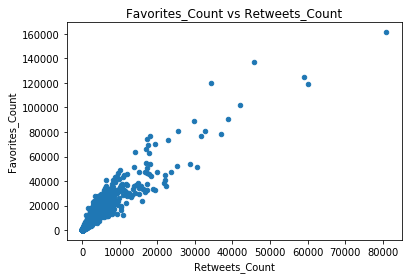

In [74]:
# 1) Are favorite counts and retweet counts correlated?
df_tweets_merged.plot(y='Favorites_Count', x='Retweets_Count', kind='scatter', title='Favorites_Count vs Retweets_Count');

> The above scatter plot clearly shows a strong (and not surprising) correlation between the count of Twitter users that marked a tweet as a favorite and the count of users that retweeted it. Let's quantify this correlation by calculating the correlation coefficient.

In [75]:
# Calculate the correlation coefficient between Favorites_Count and Retweets_Count
df_tweets_merged.loc[:,'Favorites_Count':'Retweets_Count'].corr()

,Favorites_Count,Retweets_Count
Favorites_Count,1.000000,0.926933
Retweets_Count,0.926933,1.000000


> A correlation coefficient of 0.93 is a high degree of correlation indeed.
>
> Since Favorites_Count and Retweets_Count are so highly correlated we will only analyze one of these in the investigation of question \#2.

### Analysis Question \#2

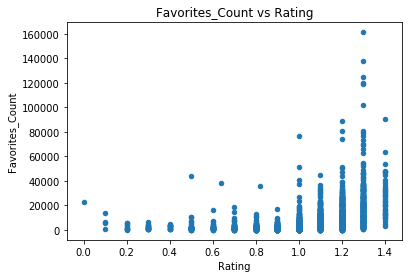

In [76]:
# 2) Are the assigned “ratings” and favorite counts and/or retweet counts correlated?
# Due to the querky way that ratings are assigned we excluded some values as outliers in an earlier cleaning step
df_tweets_merged.plot(y='Favorites_Count', x='Rating', kind='scatter', title='Favorites_Count vs Rating');

> This scatter plot does not show much visual evidence of a strong correlation. However, let's quantify this by calculating the  correlation coefficient.

In [77]:
# Calculate the correlation coefficient between Favorites_Count and Rating
df_tweets_merged.loc[:,['Favorites_Count','Rating']].corr()

,Favorites_Count,Rating
Favorites_Count,1.000000,0.380882
Rating,0.380882,1.000000


> The above calculation confirms that there is no strong correlation between Favorites_Count and Rating.

### Analysis question \#3
>
> For this question we need to extract the predictions in the image prediction data for the Tweet_IDs that have a True in Non_Dog_Protest column. We know from inspection that most of these submissions in fact _DO_ contain a dog but the depicted dog, in some cases, may not be obvious. So these may present a challenge for the AI classification. We will check whether the image prediction data indicates that the image contains a dog or not and examine the confidence that the algorithm assigned to this prediction

In [78]:
# extract a list of Tweet_IDs from df_tweets_merged that has Non_Dog_Protest == True
protest_list = df_tweets_merged[df_tweets_merged['Non_Dog_Protest'] == True].index.values
protest_list

array([673906403526995968, 675109292475830276, 675153376133427200,
       677895101218201600, 679148763231985668, 679530280114372609,
       680055455951884288, 680970795137544192, 681297372102656000,
       685532292383666176, 688116655151435777, 690360449368465409,
       693647888581312512, 697259378236399616, 700747788515020802,
       703041949650034688, 708130923141795840, 711306686208872448,
       712717840512598017, 714141408463036416, 715733265223708672,
       717537687239008257, 726224900189511680, 730924654643314689,
       735274964362878976, 736225175608430592, 737678689543020544,
       738184450748633089, 739544079319588864, 740214038584557568,
       745422732645535745, 746872823977771008, 747461612269887489,
       748977405889503236, 757596066325864448, 759923798737051648,
       761745352076779520, 770655142660169732, 771014301343748096,
       772581559778025472, 780192070812196864, 781524693396357120,
       781661882474196992, 806219024703037440, 809920764300447

In [79]:
# Extract these rows from the image prediction data
df_predict_protest = df_img_clean.loc[protest_list]
df_predict_protest.head()

,Image_URL,Image_Number,Predict_1,Predict_1_Conf,Predict_1_Dog_Breed,Predict_2,Predict_2_Conf,Predict_2_Dog_Breed,Predict_3,Predict_3_Conf,Predict_3_Dog_Breed
Tweet_ID,,,,,,,,,,,
673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,none,dog,0.048928,soft-coated_wheaten_terrier,dog,0.030386,Siberian_husky
675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dog,0.989519,dalmatian,dog,0.005258,English_setter,dog,0.001443,German_short-haired_pointer
675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,none,mailbox,0.096027,none,seat_belt,0.034995,none
677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dog,0.550702,dalmatian,dog,0.060226,kuvasz,dog,0.058631,Great_Pyrenees
679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,dog,0.302685,Italian_greyhound,hair_slide,0.124281,none,dog,0.059846,Afghan_hound


In [80]:
# add a column to indicate whether the dog was detected in any of the three predictions
df_predict_protest['Dog_Detect'] = True
df_predict_protest['Dog_detect_Conf'] = np.NaN
for row in df_predict_protest.itertuples():
    df_predict_protest.loc[row.Index, 'Dog_Detect'] = (row.Predict_1 == 'dog') or (row.Predict_2 == 'dog') or (row.Predict_3 == 'dog')
    conf = 0
    if row.Predict_1 == 'dog':
        conf += row.Predict_1_Conf
    if row.Predict_2 == 'dog':
        conf += row.Predict_2_Conf
    if row.Predict_3 == 'dog':
        conf += row.Predict_3_Conf   
    df_predict_protest.loc[row.Index, 'Dog_Detect_Conf'] = conf
    if df_predict_protest.loc[row.Index, 'Dog_Detect'] == False:
        print(row.Index, row.Image_URL, row.Predict_1, '(', row.Predict_1_Conf, ')', row.Predict_2,  '(', row.Predict_2_Conf, ')', row.Predict_3,  '(', row.Predict_3_Conf, ')')

675153376133427200 https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg paper_towel ( 0.327957 ) mailbox ( 0.09602689999999997 ) seat_belt ( 0.034995099999999994 )
693647888581312512 https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg washbasin ( 0.272451 ) doormat ( 0.165871 ) bathtub ( 0.0663684 )
703041949650034688 https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg hippopotamus ( 0.581403 ) doormat ( 0.152445 ) sea_lion ( 0.0263643 )
735274964362878976 https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg studio_couch ( 0.944692 ) four-poster ( 0.00794163 ) quilt ( 0.00630206 )
747461612269887489 https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg binoculars ( 0.192717 ) barbershop ( 0.08583819999999999 ) ballplayer ( 0.0846722 )
757596066325864448 https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg doormat ( 0.8452559999999999 ) wallet ( 0.095718 ) wool ( 0.0260719 )
761745352076779520 https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg paddle ( 0.393118 ) canoe ( 0.17808800000000002 ) lakeside ( 0.0997126 )
77

In [81]:
# Calculate the percentage of cases where no dog was detected in any of the three predictions
t, f = df_predict_protest.Dog_Detect.value_counts()
pct_fail = f/(t+f)
print('Image prediction algorithm failed to detect any dog in ', round(pct_fail*100, 2), '% of these "protest" cases')
df_predict_protest[df_predict_protest['Dog_Detect']==False]

Image prediction algorithm failed to detect any dog in  16.67 % of these "protest" cases


,Image_URL,Image_Number,Predict_1,Predict_1_Conf,Predict_1_Dog_Breed,Predict_2,Predict_2_Conf,Predict_2_Dog_Breed,Predict_3,Predict_3_Conf,Predict_3_Dog_Breed,Dog_Detect,Dog_detect_Conf,Dog_Detect_Conf
Tweet_ID,,,,,,,,,,,,,,
675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,none,mailbox,0.096027,none,seat_belt,0.034995,none,False,NaN,0.0
693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,none,doormat,0.165871,none,bathtub,0.066368,none,False,NaN,0.0
703041949650034688,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,none,doormat,0.152445,none,sea_lion,0.026364,none,False,NaN,0.0
735274964362878976,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1,studio_couch,0.944692,none,four-poster,0.007942,none,quilt,0.006302,none,False,NaN,0.0
747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,none,barbershop,0.085838,none,ballplayer,0.084672,none,False,NaN,0.0
757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,none,wallet,0.095718,none,wool,0.026072,none,False,NaN,0.0
761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,none,canoe,0.178088,none,lakeside,0.099713,none,False,NaN,0.0
770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,none,skunk,0.161184,none,paper_towel,0.091572,none,False,NaN,0.0
771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,none,doormat,0.111790,none,macaque,0.088925,none,False,NaN,0.0


In [82]:
# Examine the mean confidence that a dog was detected in these "protest" cases
df_predict_protest.Dog_Detect_Conf.describe()

count    66.000000
mean      0.601927
std       0.382873
min       0.000000
25%       0.162050
50%       0.774812
75%       0.923406
max       0.999561
Name: Dog_Detect_Conf, dtype: float64

### Analysis question \#4
>
> The question of whether the WeRateDogs Twitter followers respond to video submissions more favorably than to photo submissions calls for a inferential statistical analysis. The metric of follower response is favorite countss (or equivalently, due to the high degree of correlation, retweet counts) so this the response variable in this analysis. The independent or predictor variable in this analysis is the submission media format the the rating tweet is about. This media format is categorized as either photo, video or other. This latter category is likely photo in fact (based on inspection) but was not detected as such using the simple programmatic algorithm that was applied. In the following the built-in z-test is used to evaluate the hypotheses: Null hypothesis: p_fav_video < or = p_fav_photo Alternative hypothesis: p_fav_video > p_fav_photo. These p_fav_* ratios are approximated by dividing the favorite count for a given tweet by the number of WeRateDogs Twtter account followers at the time that the tweet was sent. This is not precisely accurate since upon retweet non-followers of the account can add to the favorite count; however, this approximation should be sufficient for this analysis.

In [83]:
# Use the statsmodels package to calculate the proportions and apply z-test described above
import statsmodels.api as sm
n_video = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'video'].shape[0]
avg_followers_video = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'video'].Followers_Count.mean()
n_photo = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'photo'].shape[0]
avg_followers_photo = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'photo'].Followers_Count.mean()
print('n_video =',n_video,'avg_followers_video=',round(avg_followers_video), 'n_photo=',n_photo, 'avg_followers_photo=',round(avg_followers_photo))
#df_tweets_merged.Submitted_Media.value_counts()
fav_video = df_tweets_merged[df_tweets_merged['Submitted_Media']=='video'].Favorites_Count.sum()
fav_photo = df_tweets_merged[df_tweets_merged['Submitted_Media']=='photo'].Favorites_Count.sum()
print('fav_video=',fav_video,'fav_photo=',fav_photo)
sm.stats.proportions_ztest([fav_video, fav_photo], [n_video*avg_followers_video, n_photo*avg_followers_photo], alternative='larger')

n_video = 72 avg_followers_video= 8229914 n_photo= 1899 avg_followers_photo= 8229922
fav_video= 1565156.0 fav_photo= 15282611.0


(1233.9709866277926, 0.0)

> The above results (z-score = 607.3, p-value = 0.0) indicates that the data overwhelmingly supports rejecting the null hypothesis. Let's plot the histograms to get a visualization of the relationship between favorites counts for WeRateDogs tweets that comment on videos vs. this account's tweets about photos.

avg_fav_ratio_video= 0.0026413735049069416 avg_fav_ratio_photo= 0.0009809598259845772


Text(0.5, 1.0, 'Distribution of favorite ratios for video and photo')

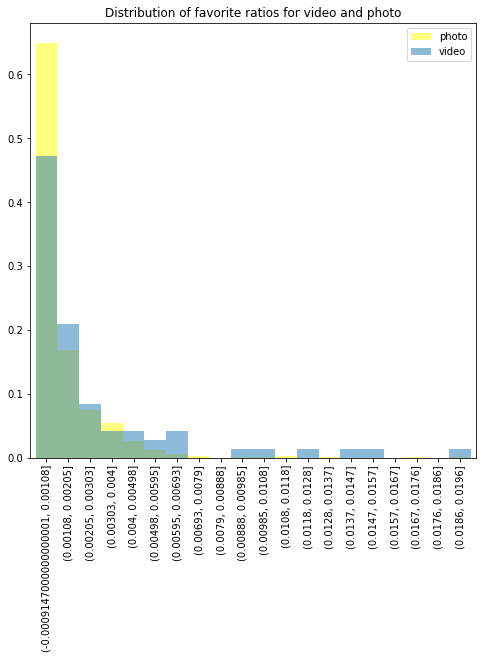

In [84]:
# Plot normalized histograms in uniform bins
fav_ratios_photo = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'photo'].Favorites_Count/avg_followers_photo
#fav_ratios_photo.describe()
ax=fav_ratios_photo.value_counts(normalize=True, sort=False, bins=20).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='photo')
fav_ratios_video = df_tweets_merged[df_tweets_merged['Submitted_Media'] == 'video'].Favorites_Count/avg_followers_video
#fav_ratios_video.describe()
ax=fav_ratios_video.value_counts(normalize=True, sort=False, bins=20).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='video')

print('avg_fav_ratio_video=',fav_ratios_video.mean(), 'avg_fav_ratio_photo=',fav_ratios_photo.mean())
ax.legend(loc='upper right')
ax.set_title('Distribution of favorite ratios for video and photo')

Text(0.5, 1.0, 'Distribution of favorite ratios for video and photo on non-uniform bins')

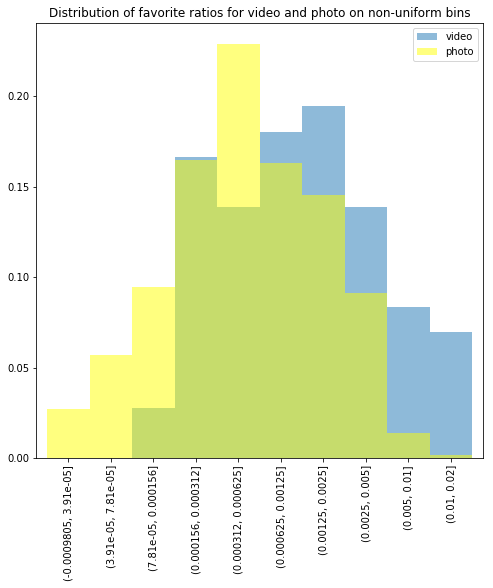

In [85]:
# Plot normalized histograms in non-uniform bins to see distribution at lower fav_ratio values
bins = np.zeros(11)
for i in range(0,11):
    bins[10-i] = 0.02/2**i
    
ax=fav_ratios_video.value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, label='video')
ax=fav_ratios_photo.value_counts(normalize=True, sort=False, bins=bins).plot(kind='bar',figsize=(8,8), width=1, alpha=0.5, color='yellow', label='photo')

#print('avg_fav_ratio_video=',fav_ratios_video.mean(), 'avg_fav_ratio_photo=',fav_ratios_photo.mean())
ax.legend(loc='upper right')
ax.set_title('Distribution of favorite ratios for video and photo on non-uniform bins')

> This latter plot (which uses non-uniform bins that increase by 2x from left to right) clearly shows the difference in favorites ratio distributions between tweets about dogs in video submissions and dogs in still photo submissions. 

## Acknowledgements

> Code for accessing additional info on tweets via the Twitter API was obtained from twitter-api.py downloaded from [Udacity]( https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/d7e3de1b-d7a1-4ebc-9d58-beba021a7c29)
